In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species'] 

df = pd.read_csv("D:\Jupyter\LGMVIP-DataScience Projects\Task1-Iris_Classification\Data\iris.data", names=columns)

In [3]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Column Wise missing values 
print(df.isna().sum().sort_values(ascending = False))

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Species         0
dtype: int64


In [8]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

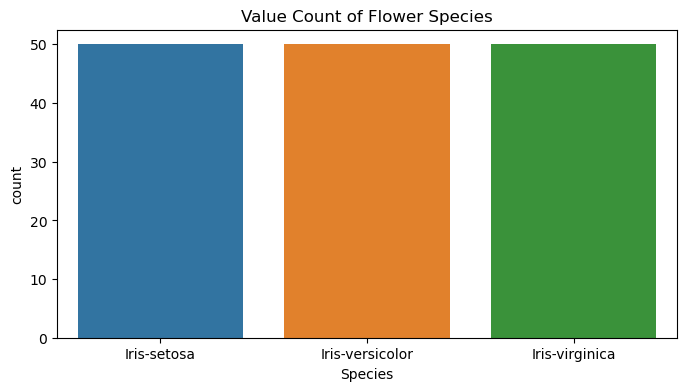

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(df['Species']).set_title("Value Count of Flower Species")
plt.show()

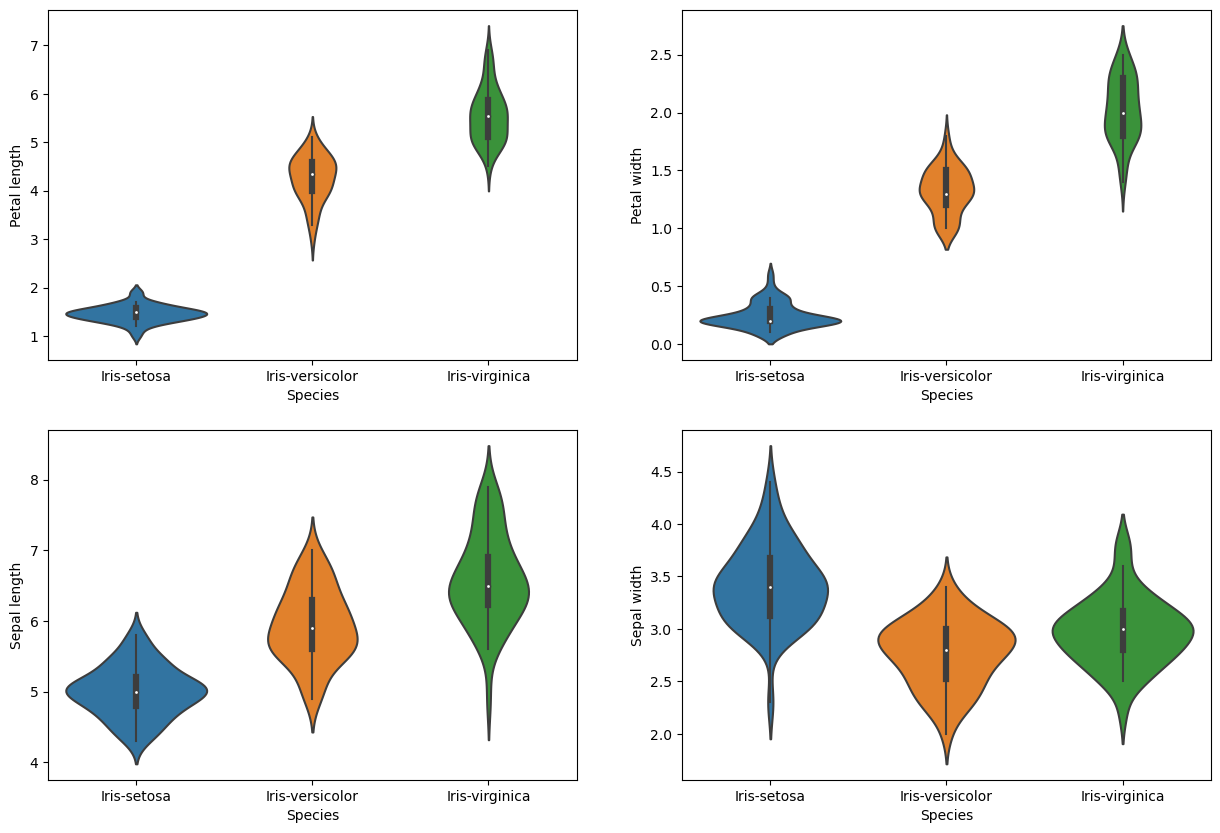

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='Petal length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='Petal width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='Sepal length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='Sepal width',data=df)
plt.show()

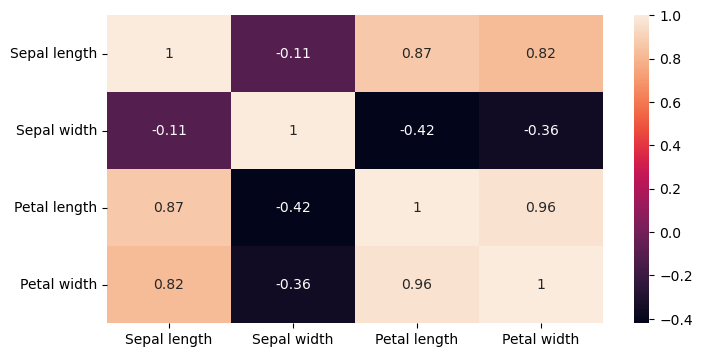

In [11]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
X = df.drop(['Class_labels'], axis=1)
y = df['Class_labels']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [26]:
from sklearn.model_selection import train_test_split # Splitting the dataset for training and testing
from sklearn import metrics # For checking the model accuracy
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=777,test_size=0.2)

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

prediction = model.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 1.0


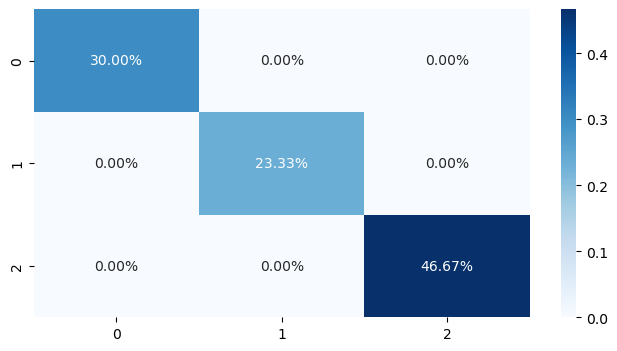

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
cf_matrix = confusion_matrix(y_test,prediction)

plt.figure(figsize=(8, 4))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

In [29]:
from sklearn.tree import DecisionTreeClassifier # For using Decision Tree Algoithm
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 1.0


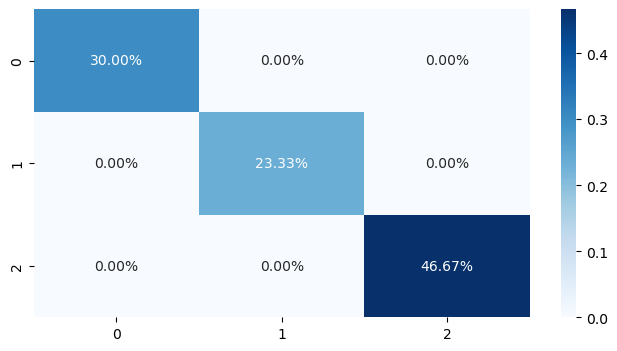

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
cf_matrix = confusion_matrix(y_test,prediction)

plt.figure(figsize=(8, 4))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

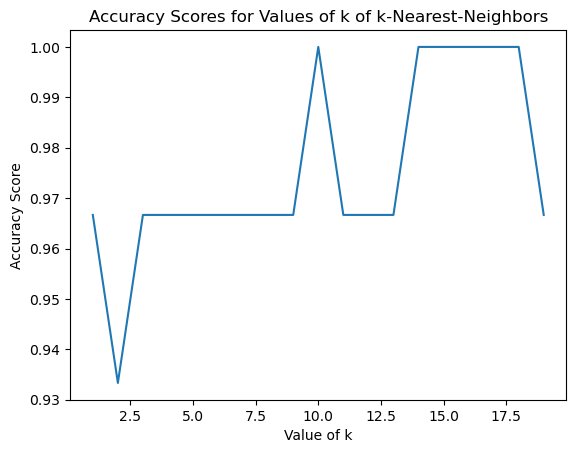

In [41]:
from sklearn.neighbors import KNeighborsClassifier # For using  K-Nearest Neighbors

# Experimenting with different n values
k_range = list(range(1,20))
scores = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [37]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)

predictions = model.predict(x_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(predictions,y_test))

The accuracy of the Decision Tree is 1.0


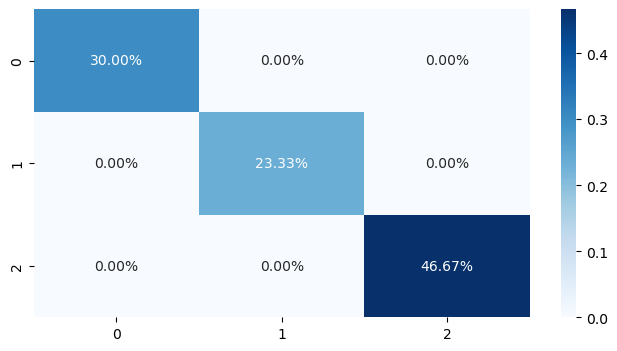

In [38]:
cf_matrix = confusion_matrix(y_test,y_pred_KNN)

plt.figure(figsize=(8, 4))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()